## [作業重點]
了解如何使用 Sklearn 中的 hyper-parameter search 找出最佳的超參數

### 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [105]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')


In [106]:
# 讀取資料集
diabetes = datasets.load_diabetes() 
len(diabetes['target'])

442

In [107]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=42)

# 建立模型
clf = GradientBoostingRegressor()


In [108]:
# 先看看使用預設參數得到的結果，約為 3197的 MSE
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

3193.425008478814


In [109]:
# 設定要訓練的超參數組合
n_estimators = [80, 100, 242]
max_depth = [1, 3, 5]


param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(clf, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

# 預設會跑 3-fold cross-validadtion，總共 9 種參數組合，總共要 train 27 次模型

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.9s finished


In [110]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: -3351.749150 using {'max_depth': 1, 'n_estimators': 100}


In [111]:
grid_result.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [112]:
# 使用最佳參數重新建立模型
clf_bestparam = GradientBoostingRegressor(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'])

# 訓練模型
clf_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = clf_bestparam.predict(x_test)

In [113]:
# 調整參數後約可降至 2800 的 MSE
print(metrics.mean_squared_error(y_test, y_pred))

2799.577460263377


In [114]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184., 144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,
        72., 178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52.,
       102.])

In [115]:
y_pred

array([148.00312643, 160.12100741, 144.0537978 , 272.74903958,
       112.60700661, 103.10411843, 261.94853037, 192.95524176,
       145.90931115, 144.7962292 , 101.97719389, 162.65200034,
        97.50750652, 235.30358957, 117.38440341, 111.44680101,
       202.94931933, 276.8784949 , 190.41163927, 224.92079222,
       199.51716183,  98.86937815,  80.85200065, 208.9301746 ,
       142.22279529, 187.9232504 , 185.92447827, 177.93830095,
        75.27564882, 112.60700661, 182.41545256, 103.4016683 ,
       158.558972  , 182.8798483 , 177.94005214, 238.16038597,
       135.49054056, 123.85754906, 166.62908775,  77.74418491,
        77.28948055, 114.47349278, 166.98457026, 147.23033215,
       165.69392066,  80.85200065, 101.38783657, 108.65763658,
        86.1756083 , 150.61807117, 130.30153975,  93.23624744,
       143.0961712 , 106.43672803, 194.05726293, 129.9837298 ,
       101.97719389, 187.77236567,  98.00668869,  96.63075256,
       191.24563551, 202.89760174, 124.67200388, 126.22

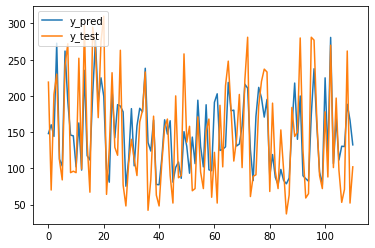

In [119]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred)),y_pred)
plt.plot(range(len(y_pred)),y_test)
plt.legend(['y_pred', 'y_test'], loc='upper left')  
plt.show()